### PROBLEM STATMENT

VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurance at the best prices with 24/7 claim settlement.  It offers different types of policies for both personal and commercial vehicles. It has established its brand across different regions in India.

Around 90% of businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at the doorstep, etc. In order to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

In order to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high-performance and interpretable machine learning model to predict the CLTV based on user and policy data.


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Extraction

In [70]:
train_data = pd.read_csv("train_BRCpofr_yY5tzKr.csv")
test_data = pd.read_csv("test_koRSKBP_Ua94SFA.csv")

## Data Exploration

In [3]:
train_data.head()

id  gender   area qualification         income  marital_status  vintage  \
0   1    Male  Urban      Bachelor         5L-10L               1        5   
1   2    Male  Rural   High School         5L-10L               0        8   
2   3    Male  Urban      Bachelor         5L-10L               1        8   
3   4  Female  Rural   High School         5L-10L               0        7   
4   5    Male  Urban   High School  More than 10L               1        6   

   claim_amount num_policies policy type_of_policy    cltv  
0          5790  More than 1      A       Platinum   64308  
1          5080  More than 1      A       Platinum  515400  
2          2599  More than 1      A       Platinum   64212  
3             0  More than 1      A       Platinum   97920  
4          3508  More than 1      A           Gold   59736

We can observer that there are many categorial features in our dataset

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [6]:
train_data.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [7]:
test_data.nunique()

id                59595
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount       9839
num_policies          2
policy                3
type_of_policy        3
dtype: int64

##### There are no null values in both train and test data
##### the following features  are categorial and have the following unique values

In [8]:
for i in ["gender", "area", "qualification", "income", "marital_status", "vintage", "num_policies", "policy", "type_of_policy"]:
    print("{}:  {}".format(i, np.sort(train_data[i].unique())))

gender:  ['Female' 'Male']
area:  ['Rural' 'Urban']
qualification:  ['Bachelor' 'High School' 'Others']
income:  ['2L-5L' '5L-10L' '<=2L' 'More than 10L']
marital_status:  [0 1]
vintage:  [0 1 2 3 4 5 6 7 8]
num_policies:  ['1' 'More than 1']
policy:  ['A' 'B' 'C']
type_of_policy:  ['Gold' 'Platinum' 'Silver']


#### "<=2L" value in income will create problem ahead so lets replace it with "less_equal_2L"

In [71]:
train_data["income"] = train_data["income"].replace("<=2L", "less_equal_2L")
test_data["income"] = test_data["income"].replace("<=2L", "less_equal_2L")

In [10]:
train_data.describe().transpose()

count          mean           std      min       25%  \
id              89392.0  44696.500000  25805.391969      1.0  22348.75   
marital_status  89392.0      0.575488      0.494272      0.0      0.00   
vintage         89392.0      4.595669      2.290446      0.0      3.00   
claim_amount    89392.0   4351.502416   3262.359775      0.0   2406.00   
cltv            89392.0  97952.828978  90613.814793  24828.0  52836.00   

                    50%        75%       max  
id              44696.5   67044.25   89392.0  
marital_status      1.0       1.00       1.0  
vintage             5.0       6.00       8.0  
claim_amount     4089.0    6094.00   31894.0  
cltv            66396.0  103440.00  724068.0

In [11]:
test_data.describe().transpose()

count           mean           std      min       25%  \
id              59595.0  119190.000000  17203.738983  89393.0  104291.5   
marital_status  59595.0       0.576928      0.494051      0.0       0.0   
vintage         59595.0       4.620304      2.282511      0.0       3.0   
claim_amount    59595.0    4368.504321   3288.132408      0.0    2398.0   

                     50%       75%       max  
id              119190.0  134088.5  148987.0  
marital_status       1.0       1.0       1.0  
vintage              5.0       6.0       8.0  
claim_amount      4106.0    6104.0   32534.0

## Data visualization

In [12]:
train_data.head(1)

id gender   area qualification  income  marital_status  vintage  \
0   1   Male  Urban      Bachelor  5L-10L               1        5   

   claim_amount num_policies policy type_of_policy   cltv  
0          5790  More than 1      A       Platinum  64308

In [13]:
# plot of features wrt gender
cols = ["area", "qualification", "income", "marital_status", "vintage", "claim_amount", "num_policies", "policy", "type_of_policy", "cltv"]
plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    sns.set_palette("Set3")
    sns.histplot(data = train_data,x=cols[i],hue="gender")
    plt.title(cols[i])
    plt.xlabel(cols[i])

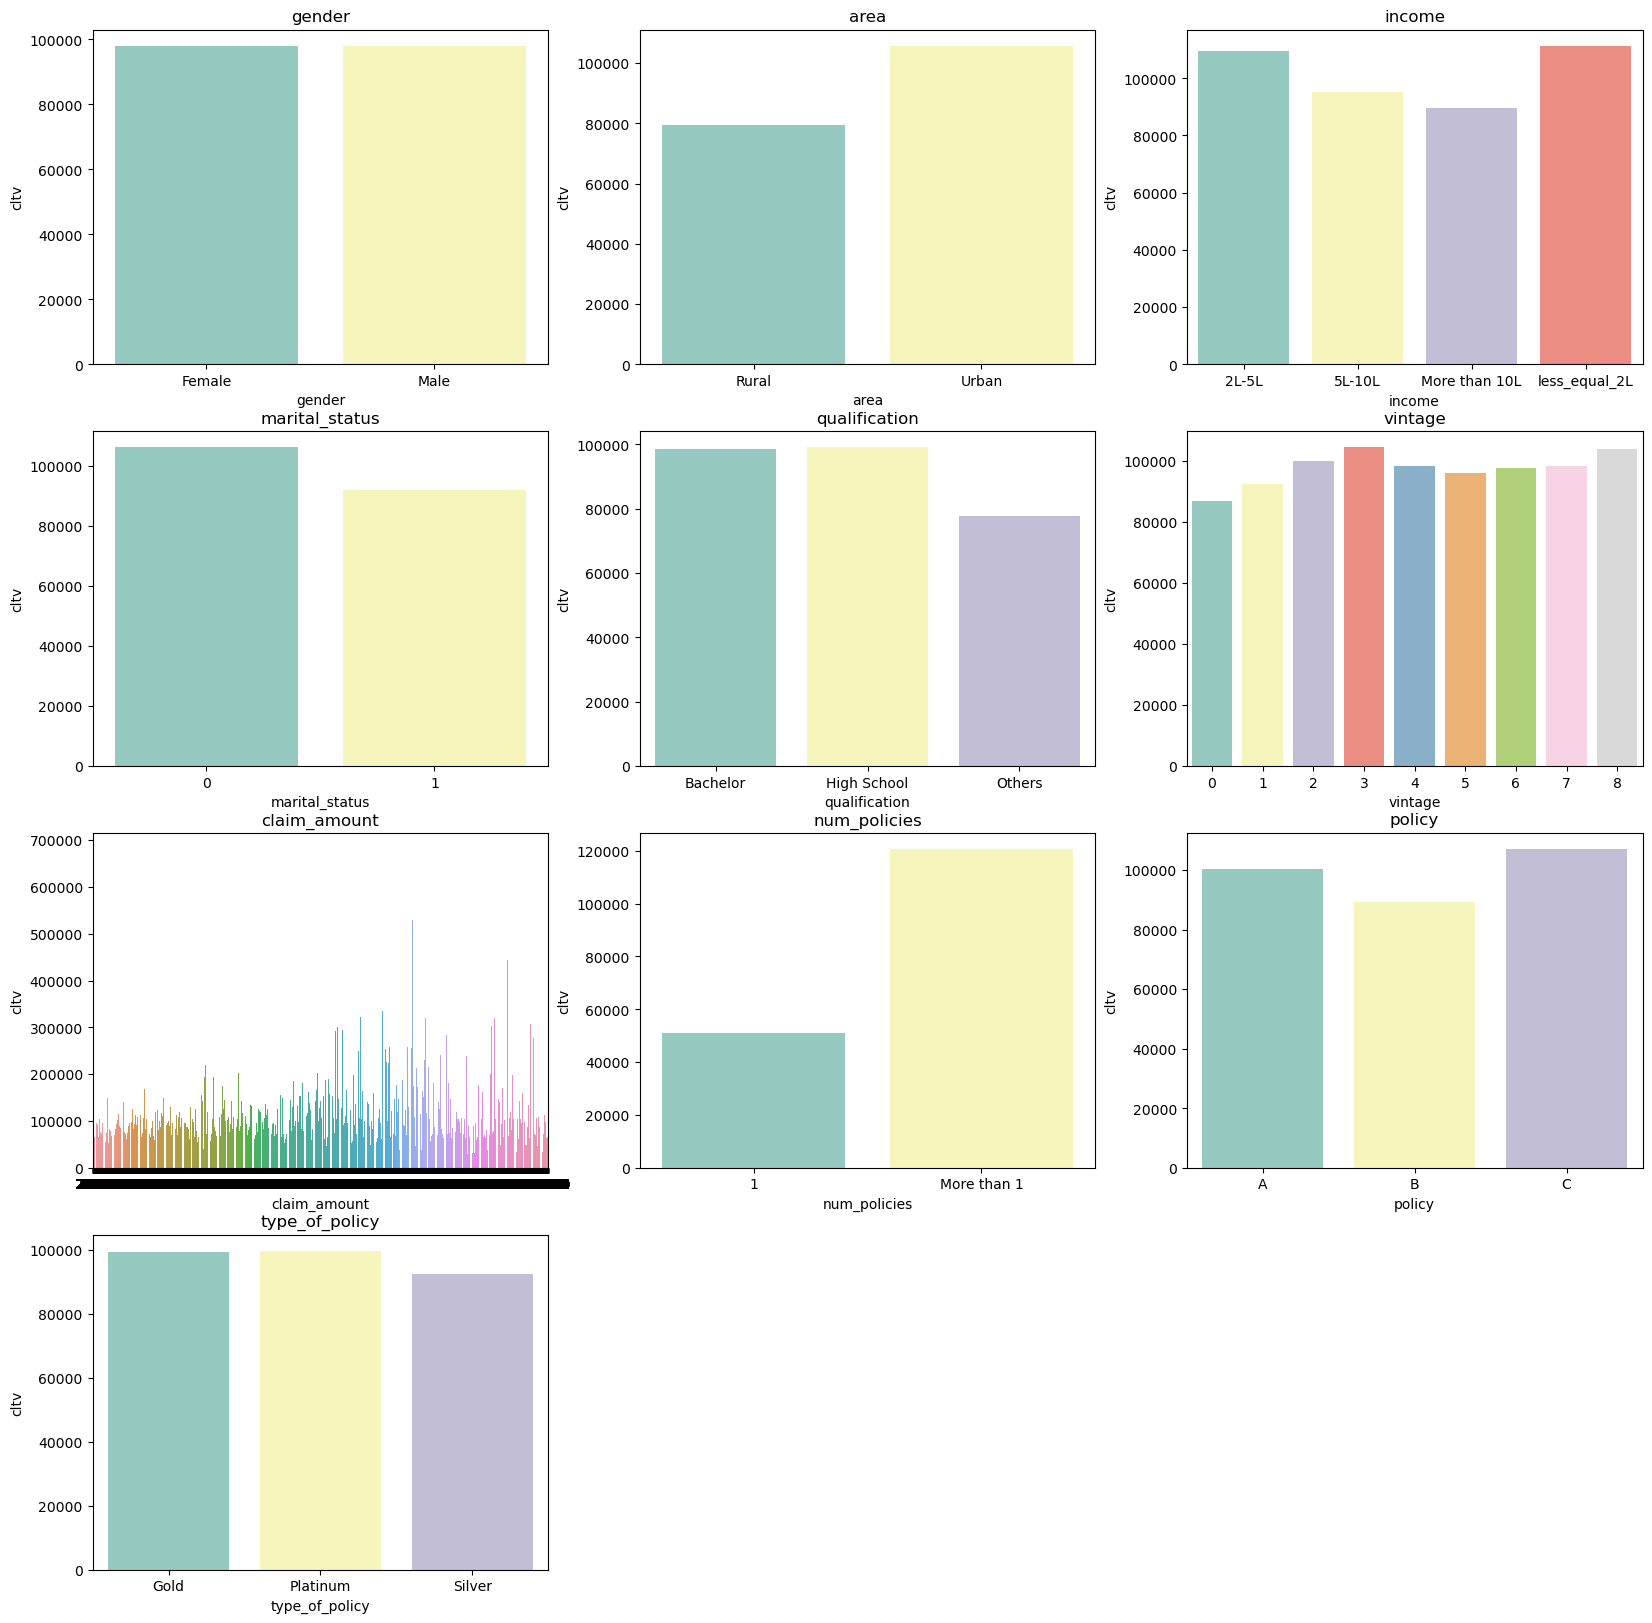

In [14]:
cols = ["gender", "area", "income", "marital_status", "qualification", "vintage", "claim_amount", "num_policies", "policy", "type_of_policy"]
plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    sns.set_palette("Set3")
    groupby_cltv = train_data.groupby(cols[i])["cltv"].mean().reset_index()
    sns.barplot(data = groupby_cltv,x=cols[i], y="cltv")
    plt.title(cols[i])
    plt.xlabel(cols[i])

- we can see a slight trend between income and cltv
- a clear relation between area and cltv
- cleat relation beteen num_policies and cltv

## Feature Encoding of categorical 

In [15]:
# performs one-hot encoding on c column
def one_hot(data, c):
    data = pd.concat([data, pd.get_dummies(data[c], prefix=c)], axis=1)
    return data.drop(c, axis=1)

# performs label encoding on the c column
def label_enc(data, c):
    dic = {"gender": {"Male": 0, "Female": 1},
           "area": {"Rural": 0, "Urban": 1},
           "qualification": {"Others": 0, "Bachelor": 2, "High School": 1},
           "income": {"less_equal_2L": 0, "2L-5L":1, "5L-10L": 2, "More than 10L": 3},
           "num_policies": {"1": 0, "More than 1": 1},
           "policy": {"C": 2, "B": 0, "A": 1},
           "type_of_policy": {"Silver": 0, "Gold": 1, "Platinum": 2} }
    
    data[c] = data[c].map(dic[c])
    return data

# encode all features in cols according to the corresponding passed into the encodArr
# 0 -> label encoding
# 1 -> one-hot encoding
# pass any other value to perform nothing on the column
def encode_data(data, cols, encodArr):
    
    for c, e in zip(cols, encodArr):
        if e == 1:
            data = one_hot(data, c)
        elif e == 0:
            data = label_enc(data, c)
    
    return data

In [16]:
catogorical_cols = ['gender', 'area', 'qualification', 'income', 'marital_status',
                    'vintage', 'num_policies', 'policy', 'type_of_policy']

In [72]:
# perforem one-hot encoding to all the categorical features
train_data_enc = encode_data(train_data, catogorical_cols, [1]*9)
test_data_enc = encode_data(test_data, catogorical_cols, [1]*9)

In [18]:
train_data_enc.isna().sum().sum(), test_data_enc.isna().sum().sum()

(0, 0)

In [73]:
train_data_enc.head(1)

id  claim_amount   cltv  gender_Female  gender_Male  area_Rural  \
0   1          5790  64308              0            1           0   

   area_Urban  qualification_Bachelor  qualification_High School  \
0           1                       1                          0   

   qualification_Others  ...  vintage_7  vintage_8  num_policies_1  \
0                     0  ...          0          0               0   

   num_policies_More than 1  policy_A  policy_B  policy_C  \
0                         1         1         0         0   

   type_of_policy_Gold  type_of_policy_Platinum  type_of_policy_Silver  
0                    0                        1                      0  

[1 rows x 33 columns]

## Correlation

<Axes: >

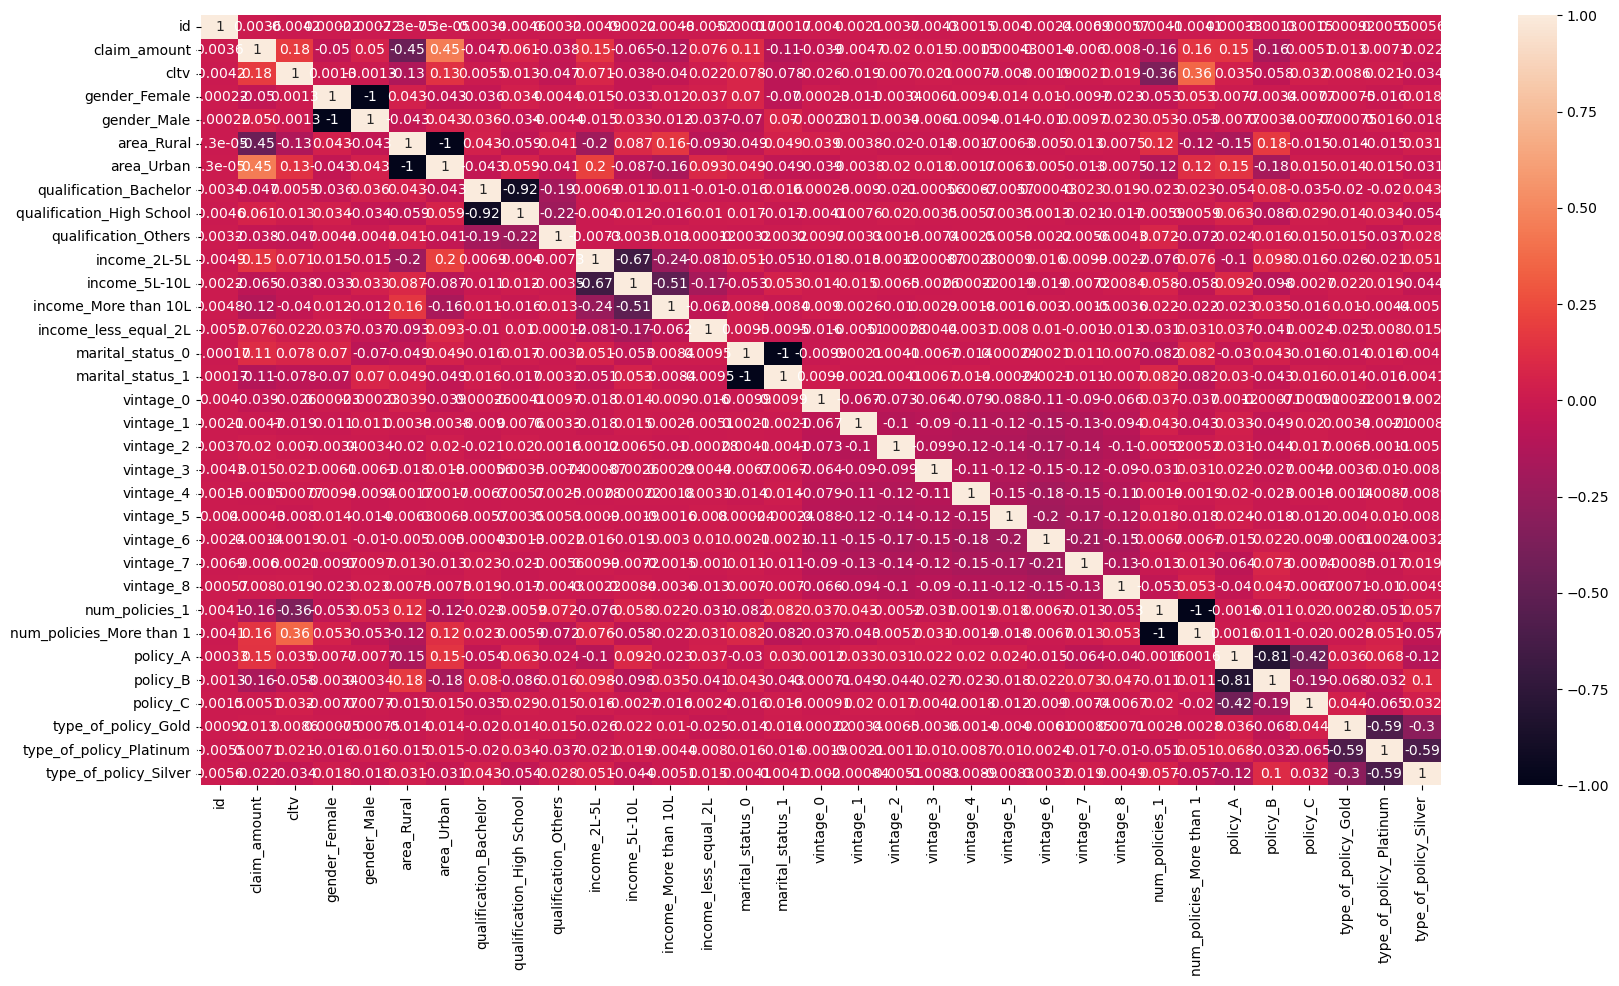

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data_enc.corr(),annot=True)

Only few features are directly correlated with the cltv 

## Feature Engineering

### I Tried performing the following feature engineering but it end up giving worst results so i comment these out

In [22]:
# mean_cols = ["gender", "area", "qualification", "income", "marital_status",
#              "vintage", "num_policies", "policy", "type_of_policy"]

# def generate_mean_fet(mean_cols, train_data, test_data):
    
#     for i in mean_cols:
#         mean_fet = train_data.groupby(i)["cltv"].mean().reset_index()
#         mean_fet.rename(columns={"cltv": "mean_"+i}, inplace=True)
#         train_data = pd.merge(train_data, mean_fet, how='left', on = i)
#         test_data = pd.merge(test_data, mean_fet, how='left', on = i)
#     return train_data, test_data

# train_data, test_data = generate_mean_fet(mean_cols, train_data, test_data)

In [23]:
# train_data["is_claim_0"] = train_data["claim_amount"].map(lambda x: int(x == 0))
# test_data["is_claim_0"] = test_data["claim_amount"].map(lambda x: int(x == 0))

In [24]:
# train_data["income_val"] = train_data["income"].map({"less_equal_2L": 1, "2L-5L":2, "5L-10L": 3, "More than 10L": 4})
# test_data["income_val"] = test_data["income"].map({"less_equal_2L": 1, "2L-5L":2, "5L-10L": 3, "More than 10L": 4})

In [25]:
# train_data["num_policies_val"] = train_data["num_policies"].map({"1": 1, "More than 1": 2})
# test_data["num_policies_val"] = test_data["num_policies"].map({"1": 1, "More than 1": 2})

In [26]:
# train_data["income_num_policies_val"] = train_data["num_policies_val"]*train_data["income_val"]
# test_data["income_num_policies_val"] = test_data["num_policies_val"]*test_data["income_val"]

## Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
mms = MinMaxScaler()
# scaling claim_amount using min max values
train_data_enc["claim_amount"] = mms.fit_transform(np.array(train_data_enc["claim_amount"]).reshape(-1, 1))
test_data_enc["claim_amount"] = mms.fit_transform(np.array(test_data_enc["claim_amount"]).reshape(-1, 1))

In [75]:
train_data_enc.head(2)

id  claim_amount    cltv  gender_Female  gender_Male  area_Rural  \
0   1      0.181539   64308              0            1           0   
1   2      0.159278  515400              0            1           1   

   area_Urban  qualification_Bachelor  qualification_High School  \
0           1                       1                          0   
1           0                       0                          1   

   qualification_Others  ...  vintage_7  vintage_8  num_policies_1  \
0                     0  ...          0          0               0   
1                     0  ...          0          1               0   

   num_policies_More than 1  policy_A  policy_B  policy_C  \
0                         1         1         0         0   
1                         1         1         0         0   

   type_of_policy_Gold  type_of_policy_Platinum  type_of_policy_Silver  
0                    0                        1                      0  
1                    0                        1                      0  

[2 rows x 33 columns]

## Spliting the data into train and test data

In [29]:
from sklearn.model_selection import train_test_split

#### Raw data for CatBoostRegressor

In [30]:
X = train_data.drop(columns=["id", "cltv"])
y = train_data["cltv"]
# Split the train data so that we can train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y Test  : ", y_test.shape)

X Train :  (71513, 10)
X Test  :  (17879, 10)
y Train :  (71513,)
y Test  :  (17879,)


#### Encoded data for other models

In [76]:
X_FE = train_data_enc.drop(columns=["id", "cltv"])
y_FE = train_data_enc["cltv"]
# Split the train data so that we can train and test
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_FE, y_FE, test_size=0.20, random_state=123)

print("X Train encoded : ", X_train_enc.shape)
print("X Test encoded  : ", X_test_enc.shape)
print("y Train encoded : ", y_train_enc.shape)
print("y Test encoded  : ", y_test_enc.shape)

X Train encoded :  (71513, 31)
X Test encoded  :  (17879, 31)
y Train encoded :  (71513,)
y Test encoded  :  (17879,)


## Utility Functions

#### Function to train multiple models and returns trained models and their evalution scores DataFrame

In [32]:
def Train_models(models, X_train, X_test, y_train, y_test, X, y):
    
    df_dic = {"r2 Test": [], "r2 Train": [], "Cross Val": []}
    
    for i in models:
        models[i].fit(X_train, y_train)
        
        pred = models[i].predict(X_train)
        df_dic["r2 Train"].append(r2_score(y_train, pred))
        
        pred = models[i].predict(X_test)
        df_dic["r2 Test"].append(r2_score(y_test, pred))
        
        df_dic["Cross Val"].append(cross_val_score(models[i], X, y, cv=10, scoring='r2').mean())
    
    return pd.DataFrame(df_dic, index=models.keys()).sort_values(by="r2 Test", ascending=False), models

#### Function to generate the Result file to submit in the hackathon

In [33]:
def generate_result(model, test_data_input, file_name):
    predictions = model.predict(test_data_input.drop(["id"], axis=1))
    results = pd.DataFrame({"id": test_data_input["id"], "cltv": predictions})
    
    results.to_csv(file_name + ".csv", index=False)

## ML Models

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score

#### Building multiple models and checking their accuracy

In [35]:
Lin_Reg_model = LinearRegression()
XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                       learning_rate=0.18)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=2.0)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42, verbose=False)
knn = KNeighborsRegressor(n_neighbors=10)
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = {"Linear Regression": Lin_Reg_model, "XG Boost": XGB_model, "Ridge Regression": ridge,
          "Lasso Regression": lasso, "Elastic Net": elastic_model, "Cat Boost Regressor": cat,
          "knn": knn, "Decision Tree": dtree, "Random Forest": rf}

In [52]:
evalutions, models = Train_models(models, X_train_enc, X_test_enc, y_train_enc, y_test_enc, X_FE, y_FE)

In [53]:
evalutions

r2 Test  r2 Train  Cross Val
Cat Boost Regressor  0.162840  0.169962   0.160294
XG Boost             0.158647  0.209192   0.154385
Lasso Regression     0.155241  0.151523   0.151777
Ridge Regression     0.155232  0.151523   0.151772
Linear Regression    0.155232  0.151523   0.151772
Elastic Net          0.153572  0.150043   0.150414
Random Forest        0.048748  0.821054   0.040241
knn                  0.002272  0.190040   0.013122
Decision Tree       -0.731802  0.943097  -0.727902

- we can see the best models are catboost and xgboost so far
- it's not a surprise that catboost performs the best because it the state of art in boosting models and also it works well with categorical features.
- from now on we will focus mainly on hyperparameter tuning of the CatBoostRegressor to increase the accuracy 

In [57]:
# generate the submission file
generate_result(models["Cat Boost Regressor"], test_data_enc, "cat_f_1")

Gives the result : 0.158461406535499

#### Now, since the catboost can also works on categorical features and it will select the hyperparameters automatically, lets run it and see the results

In [54]:
cat = CatBoostRegressor(cat_features=[0,1,2,3,7,8,9])

In [55]:
cat.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
cat.score(X_test, y_test)

0.16349201589104778

In [58]:
generate_result(cat, test_data, "cat_all_f_1")

Gives the result: 0.15887121640123736

## Hyperparameter Tuning of CatBoostRegressor using Optuna

- Optuna is an open-source hyperparameter optimization framework for machine learning models. It is designed to automate the process of tuning hyperparameters
- Optuna uses an approach called sequential model-based optimization (SMBO) to efficiently search through the hyperparameter space and find the optimal combination of hyperparameters.
- We are going to use optuna tune the hyperparameters of CatBoostRegressor

In [36]:
import sys
!{sys.executable} -m pip install optuna

In [37]:
import optuna

In [38]:
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
    }

    # Create a CatBoostRegressor model with the suggested hyperparameters
    model = CatBoostRegressor(**params)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_FE, y_FE, test_size=0.2, random_state=123)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

    # Evaluate the model
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)

    return r2

In [39]:
study = optuna.create_study(direction='maximize')

[I 2023-07-05 18:56:04,932] A new study created in memory with name: no-name-26385361-87d1-44d0-8377-18c7504a7f8b


In [40]:
# Run the optimization
study.optimize(objective, n_trials=50)

C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2023-07-05 18:56:09,660] Trial 0 finished with value: 0.16040645729116265 and parameters: {'iterations': 739, 'learning_rate': 0.0034251895057276186, 'depth': 4, 'l2_leaf_reg': 0.5873120192353061}. Best is trial 0 with value: 0.16040645729116265.
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5:

C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2023-07-05 18:56:48,542] Trial 9 finished with value: 0.1631871237739998 and parameters: {'iterations': 199, 'learning_rate': 0.041828786938567744, 'depth': 8, 'l2_leaf_reg': 0.8039232317734509}. Best is trial 5 with value: 0.16396087934810855.
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: F

C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2023-07-05 18:58:27,784] Trial 18 finished with value: 0.16369506742782391 and parameters: {'iterations': 437, 'learning_rate': 0.03092700240068333, 'depth': 7, 'l2_leaf_reg': 1.1558482849054814}. Best is trial 5 with value: 0.16396087934810855.
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: 

C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2023-07-05 18:59:12,887] Trial 27 finished with value: 0.16375691910099544 and parameters: {'iterations': 344, 'learning_rate': 0.026639415523666672, 'depth': 5, 'l2_leaf_reg': 6.0277103198145685}. Best is trial 23 with value: 0.1643494966320308.
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5:

C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2023-07-05 19:00:01,372] Trial 36 finished with value: 0.16393303613594945 and parameters: {'iterations': 407, 'learning_rate': 0.03067002634743707, 'depth': 5, 'l2_leaf_reg': 6.952192491065973}. Best is trial 32 with value: 0.16439560851888835.
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: 

C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2023-07-05 19:00:38,008] Trial 45 finished with value: 0.16449266060263745 and parameters: {'iterations': 590, 'learning_rate': 0.049097652091139664, 'depth': 5, 'l2_leaf_reg': 5.786793696190246}. Best is trial 45 with value: 0.16449266060263745.
C:\Users\prate\AppData\Local\Temp\ipykernel_5548\2350484606.py:5:

In [41]:
# Get the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best R-squared:", best_score)

Best Parameters: {'iterations': 590, 'learning_rate': 0.049097652091139664, 'depth': 5, 'l2_leaf_reg': 5.786793696190246}
Best R-squared: 0.16449266060263745


- the study reveals the best hyperparameters and the best r2 score
- lets use these hyperparameters to predict the test cltv

In [42]:
# Hyperparameter Importance
optuna.visualization.plot_param_importances(study)

- we can see tuning the learning_rate have the most effect on the results
- tuning the depth and iterations also have significant effect on the results

In [43]:
#lets train out model on the best parameters 
cat = CatBoostRegressor(**best_params)
cat.fit(X_train_enc, y_train_enc, eval_set=(X_test_enc, y_test_enc), verbose=False)
cat.score(X_test_enc, y_test_enc)

0.16449266060263745

In [44]:
# lets train the model on whole data before generating the predictions for the submission
cat.fit(X_FE, y_FE, verbose=False)

In [45]:
generate_result(cat, test_data_enc, "cat_optuna_f_1")

Results: 0.15877814507813892
- now much difference

## Hyperparameter tuning using RandomizedSearchCV

- RandomGridCV randomly sample a subset of the hyperparameter space for evaluation. Instead of exhaustively searching all combinations, it randomly selects a specified number of combinations from a predefined grid of hyperparameter values.
- This sampling approach reduces the computational burden while still exploring a diverse set of hyperparameter combinations.


In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
cat_ranCV = CatBoostRegressor()

#### After many iterations these set of hyperparameters are selected based on the final score it's giving

In [48]:
depth = [4,5,6]
learning_rate=[0.013, 0.0135, 0.014]
iterations = [900, 1000, 1100]

grid_param = {
    'iterations': iterations,
    'depth':depth,
    'learning_rate':learning_rate,
}

In [49]:
random_cv = RandomizedSearchCV(estimator=cat_ranCV,
            param_distributions=grid_param,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [50]:
random_cv.fit(X_train_enc,y_train_enc)

C:\Users\prate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.



Fitting 10 folds for each of 27 candidates, totalling 270 fits
0:	learn: 90901.3917499	total: 14.4ms	remaining: 12.9s
1:	learn: 90729.1684304	total: 29.7ms	remaining: 13.3s
2:	learn: 90558.1872437	total: 45.5ms	remaining: 13.6s
3:	learn: 90390.8751592	total: 58.4ms	remaining: 13.1s
4:	learn: 90229.3234604	total: 71ms	remaining: 12.7s
5:	learn: 90069.6147779	total: 86.9ms	remaining: 12.9s
6:	learn: 89913.9980478	total: 97.6ms	remaining: 12.4s
7:	learn: 89760.3889267	total: 114ms	remaining: 12.7s
8:	learn: 89612.3763873	total: 122ms	remaining: 12.1s
9:	learn: 89465.1359250	total: 132ms	remaining: 11.8s
10:	learn: 89323.3165075	total: 142ms	remaining: 11.5s
11:	learn: 89188.6550653	total: 151ms	remaining: 11.2s
12:	learn: 89057.6461839	total: 159ms	remaining: 10.8s
13:	learn: 88928.0631704	total: 168ms	remaining: 10.6s
14:	learn: 88802.1314300	total: 178ms	remaining: 10.5s
15:	learn: 88674.4381587	total: 188ms	remaining: 10.4s
16:	learn: 88550.6697710	total: 197ms	remaining: 10.2s
17:	lea

150:	learn: 83658.3810906	total: 1.66s	remaining: 8.22s
151:	learn: 83652.3505019	total: 1.67s	remaining: 8.22s
152:	learn: 83646.8766886	total: 1.68s	remaining: 8.22s
153:	learn: 83640.9732433	total: 1.7s	remaining: 8.23s
154:	learn: 83635.6034439	total: 1.71s	remaining: 8.22s
155:	learn: 83630.2888918	total: 1.72s	remaining: 8.21s
156:	learn: 83625.1016014	total: 1.73s	remaining: 8.2s
157:	learn: 83619.8483796	total: 1.74s	remaining: 8.18s
158:	learn: 83616.6501569	total: 1.75s	remaining: 8.15s
159:	learn: 83611.2958753	total: 1.76s	remaining: 8.14s
160:	learn: 83607.4668366	total: 1.77s	remaining: 8.12s
161:	learn: 83603.0122890	total: 1.78s	remaining: 8.1s
162:	learn: 83598.4164508	total: 1.79s	remaining: 8.09s
163:	learn: 83594.9887743	total: 1.8s	remaining: 8.07s
164:	learn: 83589.9144364	total: 1.81s	remaining: 8.05s
165:	learn: 83586.2302435	total: 1.82s	remaining: 8.03s
166:	learn: 83582.0096578	total: 1.83s	remaining: 8.02s
167:	learn: 83578.7364367	total: 1.83s	remaining: 7.

312:	learn: 83312.3354984	total: 3.35s	remaining: 6.28s
313:	learn: 83311.3156260	total: 3.36s	remaining: 6.28s
314:	learn: 83311.1392649	total: 3.37s	remaining: 6.26s
315:	learn: 83310.1937938	total: 3.38s	remaining: 6.25s
316:	learn: 83308.8751671	total: 3.39s	remaining: 6.24s
317:	learn: 83308.2549140	total: 3.4s	remaining: 6.23s
318:	learn: 83307.1719038	total: 3.41s	remaining: 6.22s
319:	learn: 83305.9062066	total: 3.42s	remaining: 6.21s
320:	learn: 83304.9441045	total: 3.43s	remaining: 6.19s
321:	learn: 83303.7660849	total: 3.44s	remaining: 6.18s
322:	learn: 83302.8728480	total: 3.45s	remaining: 6.17s
323:	learn: 83301.4634758	total: 3.46s	remaining: 6.16s
324:	learn: 83300.6431665	total: 3.47s	remaining: 6.14s
325:	learn: 83299.7167195	total: 3.48s	remaining: 6.13s
326:	learn: 83298.7596351	total: 3.49s	remaining: 6.12s
327:	learn: 83297.6925740	total: 3.5s	remaining: 6.11s
328:	learn: 83296.7699696	total: 3.51s	remaining: 6.1s
329:	learn: 83295.6147429	total: 3.52s	remaining: 6

470:	learn: 83175.7708763	total: 5.01s	remaining: 4.56s
471:	learn: 83174.8279955	total: 5.02s	remaining: 4.55s
472:	learn: 83174.2462125	total: 5.03s	remaining: 4.54s
473:	learn: 83173.1413267	total: 5.04s	remaining: 4.53s
474:	learn: 83172.8040490	total: 5.05s	remaining: 4.52s
475:	learn: 83171.6581869	total: 5.06s	remaining: 4.5s
476:	learn: 83170.8179445	total: 5.07s	remaining: 4.49s
477:	learn: 83170.0747528	total: 5.08s	remaining: 4.48s
478:	learn: 83169.3394141	total: 5.08s	remaining: 4.47s
479:	learn: 83168.7210940	total: 5.09s	remaining: 4.46s
480:	learn: 83167.8004056	total: 5.1s	remaining: 4.44s
481:	learn: 83166.6507002	total: 5.11s	remaining: 4.43s
482:	learn: 83165.3172795	total: 5.12s	remaining: 4.42s
483:	learn: 83164.0384494	total: 5.13s	remaining: 4.41s
484:	learn: 83163.9926894	total: 5.14s	remaining: 4.4s
485:	learn: 83163.5652257	total: 5.15s	remaining: 4.39s
486:	learn: 83163.0190040	total: 5.16s	remaining: 4.38s
487:	learn: 83162.5546142	total: 5.17s	remaining: 4

623:	learn: 83067.6389028	total: 6.49s	remaining: 2.87s
624:	learn: 83066.6867468	total: 6.5s	remaining: 2.86s
625:	learn: 83065.8295185	total: 6.51s	remaining: 2.85s
626:	learn: 83065.3627342	total: 6.52s	remaining: 2.84s
627:	learn: 83064.7481893	total: 6.53s	remaining: 2.83s
628:	learn: 83064.2052092	total: 6.54s	remaining: 2.82s
629:	learn: 83063.8074744	total: 6.55s	remaining: 2.81s
630:	learn: 83063.1947326	total: 6.56s	remaining: 2.8s
631:	learn: 83062.5302024	total: 6.57s	remaining: 2.79s
632:	learn: 83061.7053163	total: 6.58s	remaining: 2.77s
633:	learn: 83061.0385153	total: 6.59s	remaining: 2.77s
634:	learn: 83060.6083099	total: 6.6s	remaining: 2.75s
635:	learn: 83060.0143780	total: 6.61s	remaining: 2.74s
636:	learn: 83059.2513087	total: 6.62s	remaining: 2.73s
637:	learn: 83058.3981324	total: 6.63s	remaining: 2.72s
638:	learn: 83057.8452569	total: 6.64s	remaining: 2.71s
639:	learn: 83057.2845792	total: 6.65s	remaining: 2.7s
640:	learn: 83056.5587542	total: 6.66s	remaining: 2.

778:	learn: 82960.9966845	total: 7.95s	remaining: 1.24s
779:	learn: 82960.2671668	total: 7.96s	remaining: 1.23s
780:	learn: 82959.7106341	total: 7.97s	remaining: 1.22s
781:	learn: 82959.0901334	total: 7.99s	remaining: 1.2s
782:	learn: 82958.2312103	total: 7.99s	remaining: 1.19s
783:	learn: 82957.4046031	total: 8s	remaining: 1.18s
784:	learn: 82956.6294980	total: 8.01s	remaining: 1.17s
785:	learn: 82956.0964415	total: 8.02s	remaining: 1.16s
786:	learn: 82954.8998933	total: 8.03s	remaining: 1.15s
787:	learn: 82953.8233141	total: 8.04s	remaining: 1.14s
788:	learn: 82953.4384800	total: 8.05s	remaining: 1.13s
789:	learn: 82953.3847968	total: 8.06s	remaining: 1.12s
790:	learn: 82952.3306626	total: 8.07s	remaining: 1.11s
791:	learn: 82951.5936873	total: 8.08s	remaining: 1.1s
792:	learn: 82950.7991875	total: 8.09s	remaining: 1.09s
793:	learn: 82950.2153346	total: 8.1s	remaining: 1.08s
794:	learn: 82949.3065847	total: 8.11s	remaining: 1.07s
795:	learn: 82948.2397977	total: 8.12s	remaining: 1.06

RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002068C8CFF40>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6],
                                        'iterations': [900, 1000, 1100],
                                        'learning_rate': [0.013, 0.0135,
                                                          0.014]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [51]:
best_est_4 = random_cv.best_estimator_
best_params_4 = random_cv.best_params_ 

print("Best Parameters:", best_params_4)
print("Best estimator:", best_est_4)
print("Best_score: ", r2_score(y_test_enc, best_est_4.predict(X_test_enc)))

Best Parameters: {'learning_rate': 0.013, 'iterations': 900, 'depth': 6}
Best estimator: <catboost.core.CatBoostRegressor object at 0x000002068C8E4BE0>
Best_score:  0.16361084511600654


In [52]:
generate_result(best_est_4, test_data_enc, "cat_ranCV_01")

In [54]:
# train on whole data 
best_est_4.fit(X_FE, y_FE, verbose = False)

In [56]:
generate_result(best_est_4, test_data_enc, "cat_ranCV_f_1")

Results: 0.15904772387958

#### setting best parameters according to RandomSearchCV and setting some other hyperparameters manualy 

In [57]:
cat_best = CatBoostRegressor(**best_params_4,
                            l2_leaf_reg=2.5,
                            penalties_coefficient=2.5,
                            model_size_reg=3,
                            rsm=0.12,
                            bagging_temperature=0.3,
                            loss_function="RMSE",
                            leaf_estimation_method="Gradient")

In [58]:
cat_best.fit(X_train_enc, y_train_enc, verbose=False)
cat_best.score(X_test_enc, y_test_enc)

0.1644380521720079

In [59]:
generate_result(cat_best, test_data_enc, "cat_ranCV_f_2")

In [60]:
# Train on whole data
cat_best.fit(X_FE, y_FE, verbose=False)

In [61]:
generate_result(cat_best, test_data_enc, "cat_ranCV_f_3")

Results: 0.159457030142785

#### After many iterations and manualy tuning the hyperparameteres the following model gives the best results

In [105]:
cat_best2 = CatBoostRegressor(iterations=1000,
                                learning_rate=0.013225,
                                depth=5,
                                l2_leaf_reg=2.5,
                                penalties_coefficient=2.5,
                                model_size_reg=3,
                                rsm=0.12,
                                bagging_temperature=0.3,
                                loss_function="RMSE",
                                leaf_estimation_method="Gradient")

In [106]:
cat_best2.fit(X_train_enc, y_train_enc, verbose=False)
cat_best2.score(X_test_enc, y_test_enc)

0.16447010468256618

In [107]:
cat_best2.fit(X_FE, y_FE, verbose=False)

In [108]:
generate_result(cat_best2, test_data_enc, "cat_ranCV_f_13")

### Best Result so far: 0.1597272259